In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
import math
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder



from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

import warnings 
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)


from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV , RepeatedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , precision_score , recall_score , accuracy_score , f1_score ,roc_auc_score , roc_curve , classification_report  


In [5]:
at = pd.read_csv(r"C:\Users\shan2\files\Attrition.csv")

In [6]:
at.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
at.shape

(1470, 35)

In [8]:
target = "Yes"
labels =["Yes" ,"No"]
features = [i for i in at.columns.values if i not in [target]]

display(at.head())
print('The Dataset consist of {} features and {} samples'.format(at.shape[1], at.shape[0]))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


The Dataset consist of 35 features and 1470 samples


In [9]:
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
 at.isnull().sum()[at.isnull().sum()>0]

Series([], dtype: int64)

In [11]:
at.columns[at.dtypes=='object']

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [12]:
at.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [13]:
at.MaritalStatus.replace({"Single" : 0 , "Married" : 1 , "Divorced" : 2}, inplace=True)

In [14]:
le = LabelEncoder()
at[at.select_dtypes(include="object").columns] = at[at.select_dtypes(include="object").columns].apply(le.fit_transform) 

In [15]:
display(at.describe())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,0.902721,6502.931293,14313.103401,2.693197,0.0,0.282993,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.0,0.450606,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,0.0,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,0.000000,2911.000000,8047.000000,1.000000,0.0,0.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,0.0,0.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,1.000000,8379.000000,20461.500000,4.000000,0.0,1.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,0.0,1.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [16]:
# checking number of unique rows and columns

In [17]:

nu = at[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(at[features].shape[1]):
    if nu.values[i]<=3:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))

The Datset has 25 numerical & 10 categorical features.


In [18]:
counts = (at.Attrition.value_counts())
labes1 = tuple(labels)

Text(0.5, 1.0, 'Distribution of target feature')

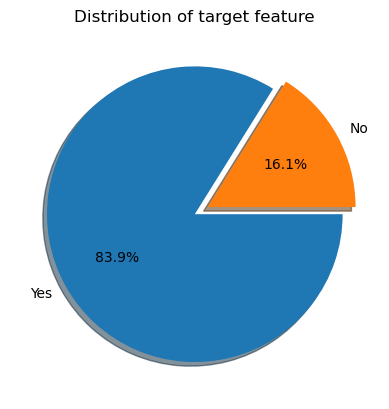

In [19]:
exp = (0,.1)
plt.pie(counts , labels= labes1 ,explode=exp, autopct='%1.1f%%', radius=1, startangle=0 ,counterclock=False ,shadow=True )
plt.title("Distribution of target feature")

Inference :- The Target Variable seems to be slightly imbalanced!

In [20]:
rows,col  = at.shape

at1 = at.copy()
at1.drop_duplicates(inplace=True)
at1.reset_index(drop=True , inplace=True)

if (rows == at1.shape[0] , col == at1.shape[1]):
    print("No duplicates  found")
else:   
    print(f'Duplicates dropped is ----> {r-at1.shape[0]}')

No duplicates  found


In [21]:
#SMOTE
at1 = at.copy()

print('Original class distribution:')
print(at1.Attrition.value_counts())

xf = at1.columns
X = at1.drop('Attrition' , axis=1)
Y = at1.Attrition

sm = SMOTE(random_state=2)
X , Y = sm.fit_resample(X , Y)

print('New class distribution:')
print(Y.value_counts())

at1 = pd.DataFrame(X , columns=xf)
at1.Attrition = Y

Original class distribution:
Attrition
0    1233
1     237
Name: count, dtype: int64
New class distribution:
Attrition
1    1233
0    1233
Name: count, dtype: int64


In [22]:
at = at1.copy()
X = at.drop('Attrition' , axis=1)
Y = at.Attrition
train_x , test_x , train_y , test_y = train_test_split( X ,Y , test_size=.2 ,random_state=40)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',train_x.shape,train_y.shape,'\nTesting set   ---> ', test_x.shape,'', test_y.shape)

Original set  --->  (2466, 34) (2466,) 
Training set  --->  (1972, 34) (1972,) 
Testing set   --->  (494, 34)  (494,)


In [23]:
std = StandardScaler()

print('Standard Scalarization on train data'.center(100))
train_x_std = std.fit_transform(train_x)
train_x_std = pd.DataFrame(train_x_std , columns=X.columns)
display(train_x_std.describe())

print('Standard Scalarization on test data'.center(100))
test_x_std = std.fit_transform(test_x)
test_x_std = pd.DataFrame(test_x_std , columns=X.columns)
display(test_x_std.describe())

                                Standard Scalarization on train data                                


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1972.0,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1972.0,1972.000000,1.972000e+03,1.972000e+03,1.972000e+03,1972.0,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03,1.972000e+03
mean,3.630182e-16,1.116979e-16,-1.171026e-16,1.153011e-16,-2.251974e-17,2.161895e-16,1.423247e-16,0.0,1.801579e-18,-1.693484e-16,-7.386474e-17,-3.423000e-16,2.666337e-16,-2.972605e-17,-1.585389e-16,-9.818605e-17,-2.702368e-17,5.224579e-17,1.171026e-16,-5.314658e-17,0.0,0.000000,-2.297013e-16,-9.188053e-17,1.779059e-16,0.0,-2.882526e-17,-2.702368e-17,1.211562e-16,1.779059e-16,-1.801579e-17,-6.035289e-17,1.981737e-17,7.206316e-18
std,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,0.0,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,0.0,1.000254,1.000254e+00,1.000254e+00,1.000254e+00,0.0,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00,1.000254e+00
min,-1.913039e+00,-2.278213e+00,-1.799853e+00,-2.288454e+00,-1.143119e+00,-1.805543e+00,-1.700449e+00,0.0,-1.828656e+00,-1.375043e+00,-1.008147e+00,-1.892109e+00,-2.061585e+00,-8.166333e-01,-1.869459e+00,-1.392559e+00,-9.655492e-01,-1.101448e+00,-1.740196e+00,-1.125093e+00,0.0,-0.632905,-1.146239e+00,-3.303201e-01,-1.419472e+00,0.0,-7.478421e-01,-1.323303e+00,-2.105470e+00,-2.162927e+00,-1.039109e+00,-1.040426e+00,-6.428705e-01,-1.043198e+00
25%,-7.090921e-01,-7.485446e-01,-8.386411e-01,-3.457803e-01,-8.809229e-01,-7.702042e-01,-9.033759e-01,0.0,-8.481249e-01,-4.351523e-01,-1.008147e+00,-8.274098e-01,-7.077901e-01,-8.166333e-01,-1.022847e+00,-4.594546e-01,-9.655492e-01,-7.437218e-01,-8.343450e-01,-7.032900e-01,0.0,-0.632905,-8.558876e-01,-3.303201e-01,-4.676875e-01,0.0,-7.478421e-01,-6.558299e-01,-4.393437e-01,-8.062819e-01,-6.960161e-01,-7.428596e-01,-6.428705e-01,-7.391501e-01
50%,-1.618435e-01,7.811237e-01,-2.753645e-02,-3.457803e-01,-2.254328e-01,2.651350e-01,-1.063033e-01,0.0,2.608865e-02,5.047385e-01,9.919191e-01,-2.888510e-02,6.460044e-01,1.499939e-01,2.470717e-01,4.736499e-01,4.480091e-01,-3.374143e-01,7.694839e-03,-2.814871e-01,0.0,-0.632905,-2.751856e-01,-3.303201e-01,4.840975e-01,0.0,-7.478421e-01,-2.553458e-01,-4.393437e-01,5.503631e-01,-1.813765e-01,-4.452933e-01,-3.099554e-01,-4.351025e-01
75%,6.043045e-01,7.811237e-01,8.467712e-01,-3.457803e-01,6.922535e-01,2.651350e-01,6.907693e-01,0.0,8.020258e-01,5.047385e-01,9.919191e-01,8.228745e-01,6.460044e-01,1.499939e-01,1.093684e+00,4.736499e-01,4.480091e-01,3.744028e-01,8.756757e-01,5.621187e-01,0.0,1.580017,5.958674e-01,-3.303201e-01,4.840975e-01,0.0,5.104724e-01,4.121276e-01,3.937196e-01,5.503631e-01,3.332631e-01,7.449722e-01,2.295966e-02,7.810877e-01
max,2.683849e+00,7.811237e-01,1.879086e+00,1.596894e+00,2.527626e+00,2.335813e+00,2.284915e+00,0.0,1.859391e+00,1.444629e+00,9.919191e-01,1.834339e+00,1.999799e+00,3.049875e+00,1.516990e+00,1.406754e+00,1.861567e+00,3.268349e+00,1.775774e+00,2.671133e+00,0.0,1.580017,2.918675e+00,3.027367e+00,1.435883e+00,0.0,3.027101e+00,4.016484e+00,2.892909e+00,1.907008e+00,5.822752e+00,4.315769e+00,4.350856e+00,4.125611e+00


                                Standard Scalarization on test data                                 


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,494.0,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,494.0,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,494.0,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02,4.940000e+02
mean,-7.910901e-17,-8.630074e-17,-1.510263e-16,1.294511e-16,-1.366428e-16,-4.315037e-17,7.191728e-17,0.0,-1.546222e-16,1.006842e-16,-7.011935e-17,-1.186635e-16,-5.753382e-17,-1.438346e-16,-1.941767e-16,1.941767e-16,8.989660e-18,6.472555e-17,-1.797932e-17,3.595864e-18,0.0,3.236278e-17,2.193477e-16,-1.042801e-16,-1.006842e-16,0.0,7.910901e-17,-2.517105e-17,-7.191728e-17,-3.595864e-17,-5.393796e-17,4.315037e-17,6.112969e-17,3.955450e-17
std,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,0.0,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,0.0,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,0.0,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00,1.001014e+00
min,-1.920489e+00,-2.436457e+00,-1.753932e+00,-2.271359e+00,-1.127942e+00,-1.711899e+00,-1.690066e+00,0.0,-1.837441e+00,-1.336980e+00,-1.024594e+00,-1.804341e+00,-2.024162e+00,-8.192518e-01,-2.040190e+00,-1.314956e+00,-9.592861e-01,-1.078212e+00,-1.689606e+00,-1.105956e+00,0.0,-6.603382e-01,-1.236118e+00,-3.718183e-01,-1.454937e+00,0.0,-7.337284e-01,-1.298023e+00,-2.158850e+00,-2.208915e+00,-1.028881e+00,-1.028934e+00,-6.868922e-01,-1.027597e+00
25%,-6.947505e-01,-8.589866e-01,-7.885790e-01,-4.012734e-01,-8.575209e-01,-7.158116e-01,-8.826263e-01,0.0,-8.838961e-01,-1.336980e+00,-1.024594e+00,-7.862742e-01,-6.801620e-01,-8.192518e-01,-1.165696e+00,-1.314956e+00,-9.592861e-01,-7.383989e-01,-8.862943e-01,-6.908022e-01,0.0,-6.603382e-01,-9.567755e-01,-3.718183e-01,-5.029649e-01,0.0,-7.337284e-01,-6.449130e-01,-5.527177e-01,-8.311322e-01,-6.877618e-01,-7.440164e-01,-6.868922e-01,-7.288139e-01
50%,-1.375967e-01,7.184832e-01,-1.163771e-01,-4.012734e-01,-1.814671e-01,2.802755e-01,-7.518669e-02,0.0,-1.791288e-02,4.577704e-01,9.759965e-01,-3.611937e-02,6.638381e-01,1.285477e-01,1.460440e-01,-3.909329e-01,4.767361e-01,-3.157317e-01,6.115255e-03,-2.756486e-01,0.0,-6.603382e-01,-1.187487e-01,-3.718183e-01,4.490070e-01,0.0,-7.337284e-01,-2.530470e-01,-5.527177e-01,5.466507e-01,-1.760836e-01,-4.590985e-01,-3.293319e-01,-4.300304e-01
75%,6.424186e-01,7.184832e-01,7.964812e-01,1.468812e+00,6.297975e-01,2.802755e-01,7.322530e-01,0.0,8.975425e-01,4.577704e-01,9.759965e-01,7.676179e-01,6.638381e-01,1.285477e-01,1.020537e+00,5.330904e-01,4.767361e-01,2.695084e-01,8.983851e-01,5.546587e-01,0.0,1.514376e+00,7.192780e-01,-3.718183e-01,4.490070e-01,0.0,5.515972e-01,4.000629e-01,2.503486e-01,5.466507e-01,3.355946e-01,6.805731e-01,2.822845e-02,7.651033e-01
max,2.648172e+00,7.184832e-01,1.990219e+00,1.468812e+00,2.657959e+00,2.272450e+00,2.347132e+00,0.0,1.780600e+00,1.355146e+00,9.759965e-01,1.946433e+00,2.007838e+00,2.971946e+00,1.457784e+00,1.457114e+00,1.912758e+00,3.164807e+00,1.758300e+00,2.630427e+00,0.0,1.514376e+00,2.674674e+00,2.689486e+00,1.400979e+00,0.0,3.122249e+00,3.534991e+00,2.659547e+00,1.924434e+00,5.111258e+00,4.099588e+00,4.676513e+00,4.051721e+00


In [24]:
at.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.234094,0.092789,0.060517,0.064922,-0.014428,0.244489,-0.029674,NaN,-0.000321,0.023570,0.052913,0.047123,0.087500,0.543976,-0.065972,0.060817,0.180814,0.534669,-0.018815,0.341549,NaN,0.023086,-0.022839,0.037631,0.150746,NaN,0.140799,0.709019,-0.000963,0.037039,0.399920,0.311429,0.270079,0.296680
Attrition,-0.234094,1.000000,-0.164653,-0.085113,-0.116414,0.096038,-0.193248,-0.085219,NaN,0.003768,-0.281971,-0.176005,-0.041750,-0.339310,-0.286167,0.034173,-0.279361,-0.389267,-0.237232,0.020972,0.008866,NaN,0.121597,-0.053999,-0.165429,-0.223845,NaN,-0.322792,-0.258532,-0.225655,-0.251629,-0.225614,-0.284468,-0.103039,-0.283190
BusinessTravel,0.092789,-0.164653,1.000000,0.029157,0.038831,-0.062804,0.071269,0.030088,NaN,-0.030440,0.072007,0.023694,0.010807,0.096094,0.096462,-0.001451,0.064171,0.077662,0.097587,-0.016515,0.029194,NaN,0.005102,-0.057498,0.020307,0.048377,NaN,0.081490,0.109878,0.045025,0.039383,0.074855,0.078524,0.029584,0.058401
DailyRate,0.060517,-0.085113,0.029157,1.000000,0.021346,-0.019994,0.004353,0.051731,NaN,-0.064535,0.026597,0.034499,0.040324,0.047480,0.044258,-0.024359,0.035891,0.082299,0.047793,-0.081389,0.071813,NaN,0.026172,-0.014935,0.021030,0.028008,NaN,0.056988,0.051389,0.001279,-0.009623,-0.002135,0.043104,-0.006243,0.017470
Department,0.064922,-0.116414,0.038831,0.021346,1.000000,-0.003636,0.056448,0.029177,NaN,-0.005625,0.031240,0.027981,-0.017349,0.035491,0.179867,0.639410,0.081698,-0.018592,0.134757,0.035831,0.000438,NaN,-0.003994,0.012397,0.025521,0.002272,NaN,0.040024,0.059771,0.100150,0.072912,0.059988,0.114870,0.071034,0.095930
DistanceFromHome,-0.014428,0.096038,-0.062804,-0.019994,-0.003636,1.000000,0.001192,-0.000768,NaN,0.051510,-0.027266,-0.009628,0.015863,-0.027027,0.001297,-0.007705,-0.038375,-0.004998,-0.018831,0.032539,-0.051815,NaN,0.004270,0.047477,0.006410,-0.009927,NaN,0.022613,-0.016874,-0.044001,-0.059349,-0.019480,-0.010973,-0.015433,-0.009026
Education,0.244489,-0.193248,0.071269,0.004353,0.056448,0.001192,1.000000,-0.009752,NaN,0.048421,0.020404,0.055526,0.012431,0.145552,0.159821,0.021151,0.043875,0.098592,0.140820,-0.031027,0.094792,NaN,-0.040898,-0.016058,0.018268,0.061921,NaN,0.110884,0.196002,-0.003649,0.047546,0.126148,0.127050,0.098842,0.127905
EducationField,-0.029674,-0.085219,0.030088,0.051731,0.029177,-0.000768,-0.009752,1.000000,NaN,-0.043739,0.102935,0.034832,-0.025508,0.034377,-0.000706,0.020948,0.011807,0.014640,-0.004693,-0.046371,-0.009536,NaN,-0.012479,0.027547,0.036429,0.019698,NaN,-0.004992,0.010010,0.082151,0.092509,0.020534,0.049826,0.013113,0.040869
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.000321,0.003768,-0.030440,-0.064535,-0.005625,0.051510,0.048421,-0.043739,NaN,1.000000,0.023456,0.011387,0.023789,0.025863,-0.010663,0.011931,-0.070780,0.021098,-0.015889,0.023653,-0.006145,NaN,-0.043800,-0.030477,-0.023054,-0.085858,NaN,0.067450,-0.012717,-0.007297,0.023584,-0.004148,-0.009407,-0.011208,-0.007291


In [25]:
at.drop(['Over18', 'EmployeeCount' ] , axis=1  , inplace=True)

In [26]:
at.drop(['StandardHours'] ,axis=1 , inplace=True)

In [27]:
at.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [28]:
at.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.234094,0.092789,0.060517,0.064922,-0.014428,0.244489,-0.029674,-0.000321,0.023570,0.052913,0.047123,0.087500,0.543976,-0.065972,0.060817,0.180814,0.534669,-0.018815,0.341549,0.023086,-0.022839,0.037631,0.150746,0.140799,0.709019,-0.000963,0.037039,0.399920,0.311429,0.270079,0.296680
Attrition,-0.234094,1.000000,-0.164653,-0.085113,-0.116414,0.096038,-0.193248,-0.085219,0.003768,-0.281971,-0.176005,-0.041750,-0.339310,-0.286167,0.034173,-0.279361,-0.389267,-0.237232,0.020972,0.008866,0.121597,-0.053999,-0.165429,-0.223845,-0.322792,-0.258532,-0.225655,-0.251629,-0.225614,-0.284468,-0.103039,-0.283190
BusinessTravel,0.092789,-0.164653,1.000000,0.029157,0.038831,-0.062804,0.071269,0.030088,-0.030440,0.072007,0.023694,0.010807,0.096094,0.096462,-0.001451,0.064171,0.077662,0.097587,-0.016515,0.029194,0.005102,-0.057498,0.020307,0.048377,0.081490,0.109878,0.045025,0.039383,0.074855,0.078524,0.029584,0.058401
DailyRate,0.060517,-0.085113,0.029157,1.000000,0.021346,-0.019994,0.004353,0.051731,-0.064535,0.026597,0.034499,0.040324,0.047480,0.044258,-0.024359,0.035891,0.082299,0.047793,-0.081389,0.071813,0.026172,-0.014935,0.021030,0.028008,0.056988,0.051389,0.001279,-0.009623,-0.002135,0.043104,-0.006243,0.017470
Department,0.064922,-0.116414,0.038831,0.021346,1.000000,-0.003636,0.056448,0.029177,-0.005625,0.031240,0.027981,-0.017349,0.035491,0.179867,0.639410,0.081698,-0.018592,0.134757,0.035831,0.000438,-0.003994,0.012397,0.025521,0.002272,0.040024,0.059771,0.100150,0.072912,0.059988,0.114870,0.071034,0.095930
DistanceFromHome,-0.014428,0.096038,-0.062804,-0.019994,-0.003636,1.000000,0.001192,-0.000768,0.051510,-0.027266,-0.009628,0.015863,-0.027027,0.001297,-0.007705,-0.038375,-0.004998,-0.018831,0.032539,-0.051815,0.004270,0.047477,0.006410,-0.009927,0.022613,-0.016874,-0.044001,-0.059349,-0.019480,-0.010973,-0.015433,-0.009026
Education,0.244489,-0.193248,0.071269,0.004353,0.056448,0.001192,1.000000,-0.009752,0.048421,0.020404,0.055526,0.012431,0.145552,0.159821,0.021151,0.043875,0.098592,0.140820,-0.031027,0.094792,-0.040898,-0.016058,0.018268,0.061921,0.110884,0.196002,-0.003649,0.047546,0.126148,0.127050,0.098842,0.127905
EducationField,-0.029674,-0.085219,0.030088,0.051731,0.029177,-0.000768,-0.009752,1.000000,-0.043739,0.102935,0.034832,-0.025508,0.034377,-0.000706,0.020948,0.011807,0.014640,-0.004693,-0.046371,-0.009536,-0.012479,0.027547,0.036429,0.019698,-0.004992,0.010010,0.082151,0.092509,0.020534,0.049826,0.013113,0.040869
EmployeeNumber,-0.000321,0.003768,-0.030440,-0.064535,-0.005625,0.051510,0.048421,-0.043739,1.000000,0.023456,0.011387,0.023789,0.025863,-0.010663,0.011931,-0.070780,0.021098,-0.015889,0.023653,-0.006145,-0.043800,-0.030477,-0.023054,-0.085858,0.067450,-0.012717,-0.007297,0.023584,-0.004148,-0.009407,-0.011208,-0.007291
EnvironmentSatisfaction,0.023570,-0.281971,0.072007,0.026597,0.031240,-0.027266,0.020404,0.102935,0.023456,1.000000,0.053561,-0.032798,0.141859,0.048225,0.026568,0.086911,0.102519,0.019601,0.040112,-0.045231,0.078719,0.024306,0.052200,0.070738,0.058658,0.026643,0.067206,0.081413,0.055790,0.082479,0.055658,0.067960


<Axes: title={'center': 'Features Correlation-Plot'}>

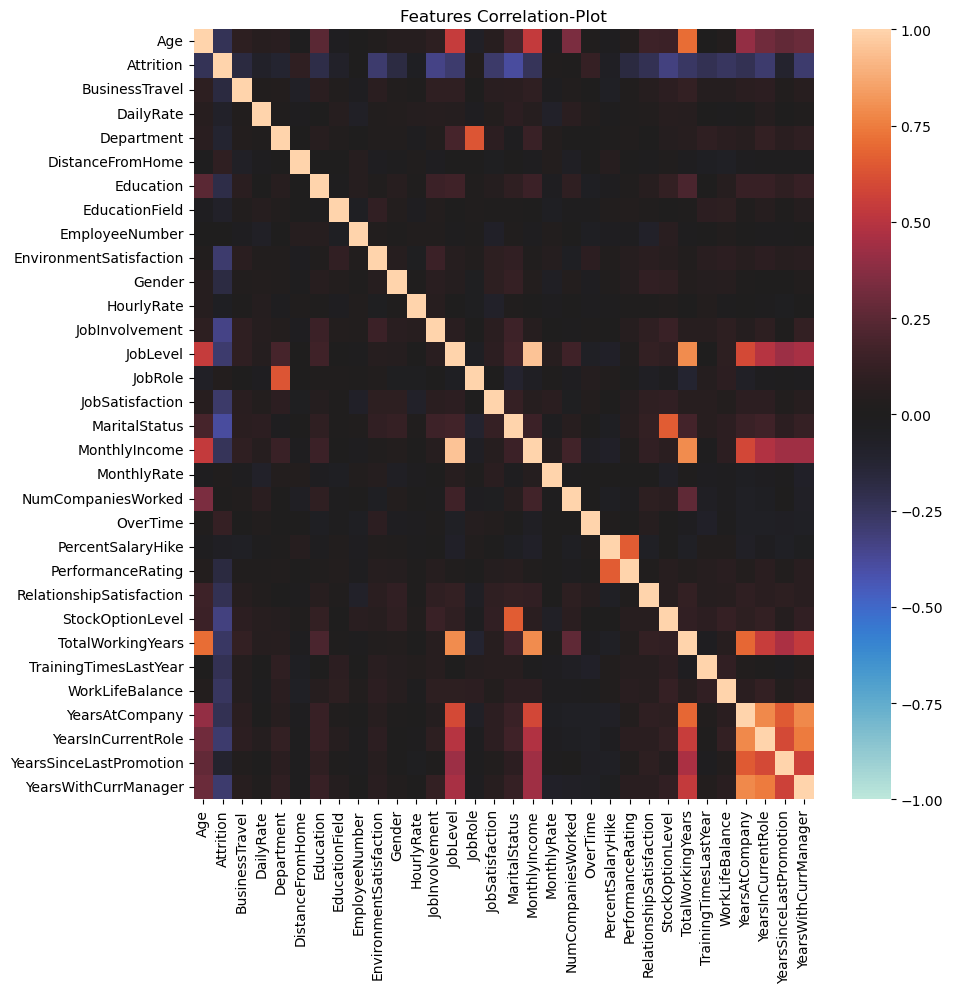

In [29]:
import seaborn as sns
plt.figure(figsize=[10,10])
plt.title('Features Correlation-Plot')
sns.heatmap(at.corr() , vmin=-1 , vmax =1 , center=0) #, 


In [30]:
from sklearn.decomposition import PCA

In [31]:
import numpy as np

In [32]:
#Check for varience

In [33]:
at2 = at1.copy()
at2.drop(['Attrition'] , axis=1 ,inplace=True)

In [34]:
scaled_pp2 = std.fit_transform(at2)

pca = PCA()
at2_pca = pca.fit_transform(scaled_pp2)
pca.explained_variance_ratio_

l1 = list(pca.explained_variance_ratio_)
np.sum(l1[0:22])

0.9189379700820314

inference - first 22 columns explains more than 90 percent of the data

In [35]:
pca= PCA(n_components=22)

x_pca1 = pca.fit_transform(train_x_std )
train_x_pca = pd.DataFrame(x_pca1)



x_pca2 = pca.fit_transform(test_x_std)
test_x_pca = pd.DataFrame(x_pca2)


print("The final training feature is : " , train_x_pca.shape)
print("The final testing feature is : " , test_x_pca.shape)


The final training feature is :  (1972, 22)
The final testing feature is :  (494, 22)


In [36]:
train_x_pca.columns

RangeIndex(start=0, stop=22, step=1)

In [37]:
train_X = train_x_std.iloc[: , 0:22]

In [38]:
test_X = test_x_std.iloc[: , 0:22]

Inference:
Correlation plt between the variables convey lot of information about the realationship betweem them. There seems to be multicollinearity in the dataset.

# predictive modelimg 

In [39]:
Evaluation_Results = pd.DataFrame(np.zeros((8,5)), columns = ['Accuracy', 'Precision','Recall','F1-score','AUC-ROC score'])

Evaluation_Results.index = ['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','Naïve Bayes Classifier (NB)',
                         'Support Vector Machine (SVM)','K Nearest Neighbours (KNN)', 'Gradient Boosting (GB)','Extreme Gradient Boosting (XGB)']

Evaluation_Results

,Accuracy,Precision,Recall,F1-score,AUC-ROC score
Logistic Regression (LR),0.0,0.0,0.0,0.0,0.0
Decision Tree Classifier (DT),0.0,0.0,0.0,0.0,0.0
Random Forest Classifier (RF),0.0,0.0,0.0,0.0,0.0
Naïve Bayes Classifier (NB),0.0,0.0,0.0,0.0,0.0
Support Vector Machine (SVM),0.0,0.0,0.0,0.0,0.0
K Nearest Neighbours (KNN),0.0,0.0,0.0,0.0,0.0
Gradient Boosting (GB),0.0,0.0,0.0,0.0,0.0
Extreme Gradient Boosting (XGB),0.0,0.0,0.0,0.0,0.0


In [40]:
#Let us define functions to summarise the Prediction's scores .

#Classification Summary Function
def Classification_Summary(pred,pred_prob,i):
    Evaluation_Results.iloc[i]['Accuracy']=round(accuracy_score(test_y, pred),3)*100   
    Evaluation_Results.iloc[i]['Precision']=round(precision_score(test_y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['Recall']=round(recall_score(test_y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['F1-score']=round(f1_score(test_y, pred, average='weighted'),3)*100 #
    Evaluation_Results.iloc[i]['AUC-ROC score']=round(roc_auc_score(test_y, pred_prob[:,1], multi_class='ovr'),3)*100 #[:, 1]
    print(' Evaluating {} '.format('<'*3,'-'*35,Evaluation_Results.index[i], '-'*35,'>'*3))
    print('Accuracy = {}%'.format(round(accuracy_score(test_y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(test_y, pred, average='weighted'),3)*100)) #
    print('Confusiton Matrix: \n ' ,confusion_matrix(test_y, pred))
    print('Classification Report:\n ' , classification_report(test_y, pred))
    
    

In [41]:
def ROC_CURVE(test_y , pred ):
    fpr = 0
    tpr = 0
    threeshold = 0
    area_under_curve = roc_auc_score(test_y , pred)
    print("Area under curve ----->  " , area_under_curve)
    
    fpr , tpr , threeshold = roc_curve(test_y , pred_prob[: , 1])
    
    plt.plot(fpr , tpr ,  lw=2, color='navy', label= ("area under curve is" , np.round(area_under_curve ,2)))
    plt.xlabel("Fpr")
    plt.ylabel("Tpr")
    plt.grid() 
    plt.fill_between(fpr, tpr, alpha=0.2, color='navy')
    plt.title("AuROC curve on Attrition Dataset")
    plt.legend(loc="lower right")
  

# Logistic Regression

In [42]:
LR = LogisticRegression()

In [43]:
LR.fit(train_X , train_y)

LogisticRegression()

In [44]:
search_dic = {'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] ,
              'penalty' : ['l1', 'l2', 'elasticnet'],
             }

In [45]:
grid = GridSearchCV(LR , param_grid = search_dic)

In [46]:
grid.fit(train_X , train_y).best_estimator_

LogisticRegression()

 Evaluating <<< 
Accuracy = 78.7%
F1 Score = 78.8%
Confusiton Matrix: 
  [[199  57]
 [ 48 190]]
Classification Report:
                precision    recall  f1-score   support

           0       0.81      0.78      0.79       256
           1       0.77      0.80      0.78       238

    accuracy                           0.79       494
   macro avg       0.79      0.79      0.79       494
weighted avg       0.79      0.79      0.79       494


Interpreting the Output of Logistic Regression:

intercept --->  0.028698282577141947
classes ----> [0 1]


,coeff
Age,-0.182552
BusinessTravel,-0.279045
DailyRate,-0.100787
Department,-0.267002
DistanceFromHome,0.185633
Education,-0.230623
EducationField,-0.100093
EmployeeCount,0.000000
EmployeeNumber,0.007781
EnvironmentSatisfaction,-0.639974


Area under curve ----->   0.7878315388655462


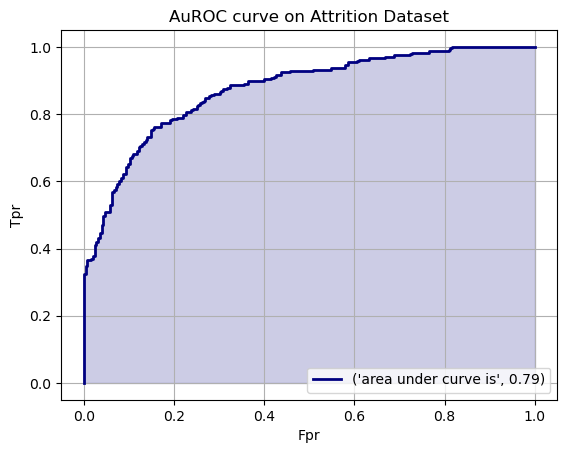

In [47]:
pred = LR.predict(test_X)

pred_prob = LR.predict_proba(test_X)
Classification_Summary(pred,pred_prob,0)

print('\nInterpreting the Output of Logistic Regression:\n')

print('intercept ---> ', LR.intercept_[0])
print('classes ---->', LR.classes_)

display(pd.DataFrame({'coeff': LR.coef_[0]}, index = train_X.columns))

ROC_CURVE(test_y , pred )

# Decision Tree

In [48]:
DT = DecisionTreeClassifier()

In [49]:
DT.fit(train_X , train_y)

DecisionTreeClassifier()

In [50]:
search_dict ={"criterion":["gini", "entropy"],
              "splitter" : ["best", "random"],
             "max_depth": range(3,10),
             "min_samples_leaf" : range(1,10),
             "max_features" : ["auto", "sqrt", "log2"]}

In [51]:
grid = GridSearchCV( DT , param_grid = search_dict)

In [52]:
grid.fit(train_X , train_y).best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       min_samples_leaf=4)

 Evaluating <<< 
Accuracy = 82.8%
F1 Score = 82.8%
Confusiton Matrix: 
  [[199  57]
 [ 28 210]]
Classification Report:
                precision    recall  f1-score   support

           0       0.88      0.78      0.82       256
           1       0.79      0.88      0.83       238

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494


Interpreting the Output of Decision Tree:

classes ----> [0 1]


,Importance
Age,0.043459
BusinessTravel,0.023665
DailyRate,0.056087
Department,0.007618
DistanceFromHome,0.045486
Education,0.032099
EducationField,0.029838
EmployeeCount,0.000000
EmployeeNumber,0.070857
EnvironmentSatisfaction,0.062551


Area under curve ----->   0.8298483455882353

Interpreting the output of Decision Tree:



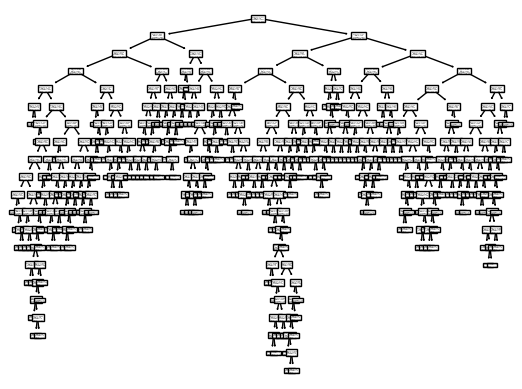

In [53]:
pred = DT.predict(test_X)

pred_prob = DT.predict_proba(test_X)
Classification_Summary(pred,pred_prob,1)

print('\nInterpreting the Output of Decision Tree:\n')
print('classes ---->', DT.classes_)

display(pd.DataFrame({'Importance': DT.feature_importances_}, index = train_X.columns))

ROC_CURVE(test_y , pred )

print('\nInterpreting the output of Decision Tree:\n')
tree.plot_tree(DT )
plt.show()

# RandomForest

In [54]:
RF = RandomForestClassifier()

In [55]:
RF.fit(train_X , train_y)

RandomForestClassifier()

In [56]:
search_dict1 = {'n_estimators' : [10 , 20 , 50 , 100 , None],
              "criterion":["gini", "entropy"],
               "max_features" : ["auto", "sqrt", "log2"]}

In [57]:
grid = GridSearchCV(RF , param_grid= search_dict1)

In [58]:
grid.fit(train_X , train_y).best_estimator_

RandomForestClassifier(criterion='entropy', max_features='log2')

 Evaluating <<< 
Accuracy = 91.7%
F1 Score = 91.7%
Confusiton Matrix: 
  [[233  23]
 [ 18 220]]
Classification Report:
                precision    recall  f1-score   support

           0       0.93      0.91      0.92       256
           1       0.91      0.92      0.91       238

    accuracy                           0.92       494
   macro avg       0.92      0.92      0.92       494
weighted avg       0.92      0.92      0.92       494


Interpreting the Output of Random Forest:

classes ----> [0 1]
Area under curve ----->   0.91726299894958

Interpreting the output of Random Forest:



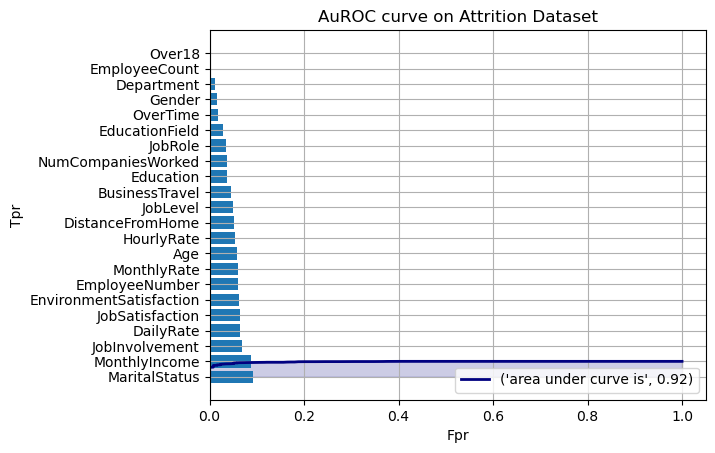

In [59]:
pred = RF.predict(test_X)

pred_prob = RF.predict_proba(test_X)
Classification_Summary(pred,pred_prob,2)

print('\nInterpreting the Output of Random Forest:\n')
print('classes ---->', RF.classes_)



ROC_CURVE(test_y , pred )

print('\n\033[1mInterpreting the output of Random Forest:\n')
rfi=pd.Series(RF.feature_importances_, index= train_x_std.columns[0:22]).sort_values(ascending=False)
plt.barh(rfi.index,rfi.values)
plt.show()

# K- Nearest Neighbour

In [60]:
KNN = KNeighborsClassifier()

In [61]:
KNN.fit(train_X , train_y)

KNeighborsClassifier()

In [62]:
search_dic_KNN = {"n_neighbors": [i for i in range(1,30,5)],
             "weights": ["uniform", "distance"],
             "algorithm": ["ball_tree", "kd_tree", "brute"],
             "leaf_size": [1, 10, 30],
             "p": [1,2]}

In [63]:
grid = GridSearchCV( KNN , param_grid = search_dic_KNN)

In [64]:
grid.fit(train_X , train_y).best_estimator_

KNeighborsClassifier(algorithm='ball_tree', leaf_size=1, n_neighbors=1, p=1)

 Evaluating <<< 
Accuracy = 80.80000000000001%
F1 Score = 80.30000000000001%
Confusiton Matrix: 
  [[166  90]
 [  5 233]]
Classification Report:
                precision    recall  f1-score   support

           0       0.97      0.65      0.78       256
           1       0.72      0.98      0.83       238

    accuracy                           0.81       494
   macro avg       0.85      0.81      0.80       494
weighted avg       0.85      0.81      0.80       494


Interpreting the Output of KNN:

classes ----> [0 1]
Area under curve ----->   0.8137145483193278


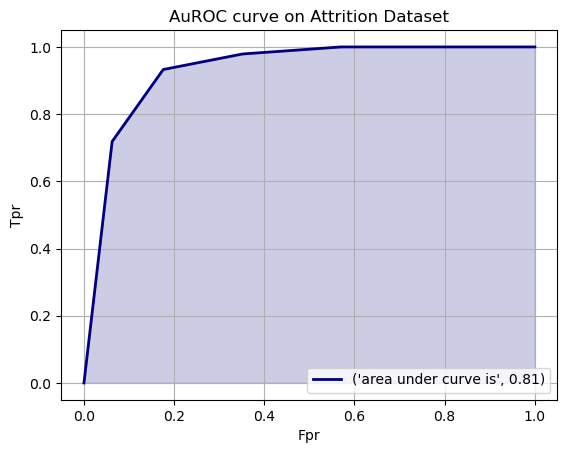

In [65]:
pred = KNN.predict(test_X)

pred_prob = KNN.predict_proba(test_X)
Classification_Summary(pred,pred_prob,5)

print('\nInterpreting the Output of KNN:\n')
print('classes ---->', KNN.classes_)



ROC_CURVE(test_y , pred )



# Naive Bias

In [66]:
NB = BernoulliNB()

In [67]:
NB.fit( train_X , train_y)

BernoulliNB()

In [68]:
search_dic_NB =  {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}

In [69]:
grid = GridSearchCV( NB , search_dic_NB)

In [70]:
grid.fit(train_X , train_y).best_estimator_

BernoulliNB(alpha=10.0)

 Evaluating <<< 
Accuracy = 78.3%
F1 Score = 78.3%
Confusiton Matrix: 
  [[202  54]
 [ 53 185]]
Classification Report:
                precision    recall  f1-score   support

           0       0.79      0.79      0.79       256
           1       0.77      0.78      0.78       238

    accuracy                           0.78       494
   macro avg       0.78      0.78      0.78       494
weighted avg       0.78      0.78      0.78       494

Area under curve ----->   0.7831867121848739


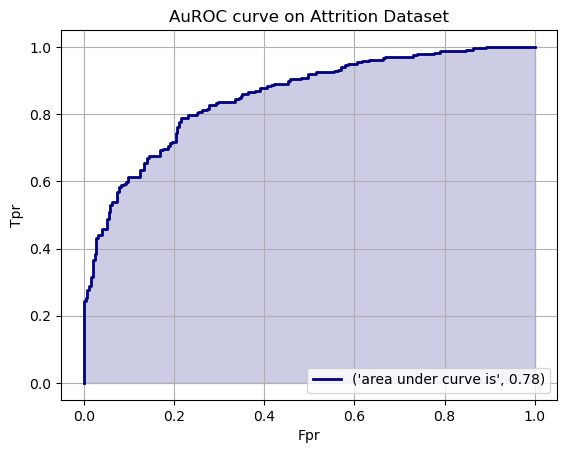

In [71]:
pred = NB.predict(test_X)
pred_prob = NB.predict_proba(test_X)
Classification_Summary(pred,pred_prob , 3)

ROC_CURVE(test_y , pred )


# SVM

In [72]:
SVM = SVC(probability=True)

In [73]:
SVM.fit(train_X , train_y)

SVC(probability=True)

In [74]:
 search_dict_svm = {"C": [.01, .1, 1, 5, 10, 100],             
             "gamma": [.01, .1, 1, 5, 10, 100],
             "kernel": ['linear', 'poly', 'rbf', 'sigmoid']}

In [75]:
grid = GridSearchCV(SVM , param_grid=search_dict_svm )

In [76]:
grid.fit(train_X , train_y).best_estimator_

SVC(C=5, gamma=0.1, probability=True)

 Evaluating <<< 
Accuracy = 86.2%
F1 Score = 86.2%
Confusiton Matrix: 
  [[218  38]
 [ 30 208]]
Classification Report:
                precision    recall  f1-score   support

           0       0.88      0.85      0.87       256
           1       0.85      0.87      0.86       238

    accuracy                           0.86       494
   macro avg       0.86      0.86      0.86       494
weighted avg       0.86      0.86      0.86       494

Area under curve ----->   0.8627560399159664


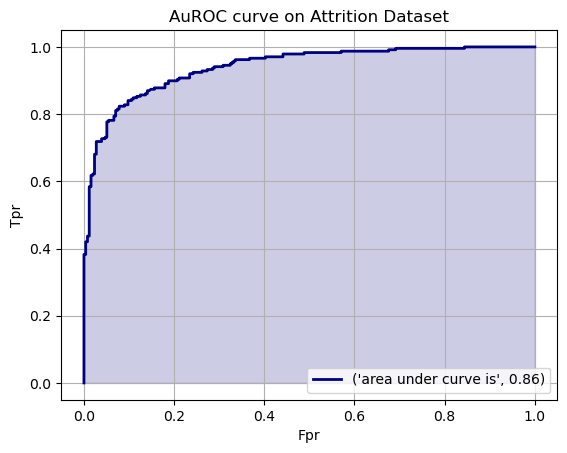

In [77]:
pred = SVM.predict(test_X)
pred_prob = SVM.predict_proba(test_X)
Classification_Summary(pred,pred_prob , 4)

ROC_CURVE(test_y , pred )


# Gradient Boost

In [78]:
GB = GradientBoostingClassifier()

In [79]:
GB.fit(train_X , train_y)

GradientBoostingClassifier()

In [80]:
search_dict_GB ={ 'criterion' : ['friedman_mse', 'squared_error'],
                "n_estimators":[5,20,100,500],
                'max_depth':[1,3,5,7,9],
                'learning_rate':[0.01,0.1,1,10,100]}

In [81]:
grid = GridSearchCV(GB , param_grid=search_dict_GB)

In [82]:
grid.fit(train_X , train_y).best_estimator_

GradientBoostingClassifier(max_depth=7, n_estimators=500)

 Evaluating <<< 
Accuracy = 88.3%
F1 Score = 88.3%
Confusiton Matrix: 
  [[223  33]
 [ 25 213]]
Classification Report:
                precision    recall  f1-score   support

           0       0.90      0.87      0.88       256
           1       0.87      0.89      0.88       238

    accuracy                           0.88       494
   macro avg       0.88      0.88      0.88       494
weighted avg       0.88      0.88      0.88       494

Area under curve ----->   0.8830258665966386


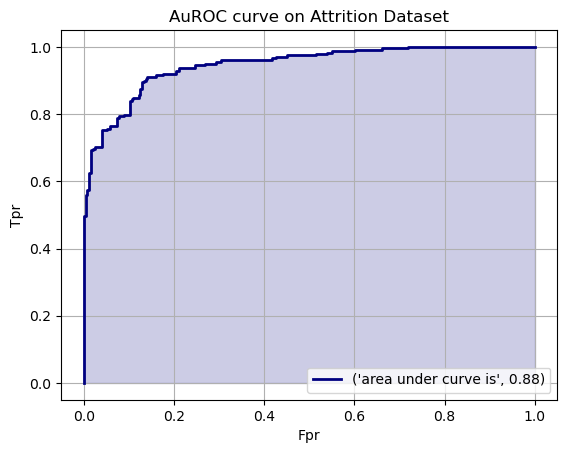

In [83]:
pred = GB.predict(test_X)
pred_prob = GB.predict_proba(test_X)
Classification_Summary(pred,pred_prob , 6)

ROC_CURVE(test_y , pred )

# XGB

In [84]:
XGB = XGBClassifier()

In [85]:
XGB.fit(train_X , train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [86]:
search_dict_XGB = {"learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
                   "max_depth" : [ 3, 4, 5, 6, 8, 10, 12, 15],
                   "min_child_weight" : [ 1, 3, 5, 7 ],
                   "gamma": [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                   "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
                        }

In [87]:
grid = GridSearchCV(XGB , param_grid=search_dict_XGB)

In [88]:
grid.fit(train_X , train_y).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

 Evaluating <<< 
Accuracy = 75.9%
F1 Score = 75.5%
Confusiton Matrix: 
  [[161  95]
 [ 24 214]]
Classification Report:
                precision    recall  f1-score   support

           0       0.87      0.63      0.73       256
           1       0.69      0.90      0.78       238

    accuracy                           0.76       494
   macro avg       0.78      0.76      0.76       494
weighted avg       0.78      0.76      0.76       494

Area under curve ----->   0.7640329569327731


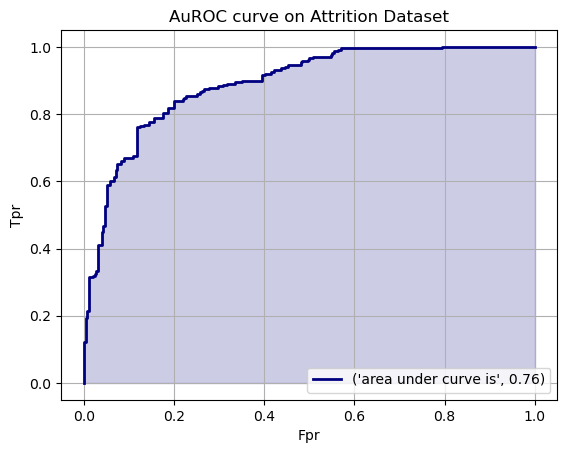

In [89]:
pred = XGB.predict(test_X)
pred_prob = XGB.predict_proba(test_X)
Classification_Summary(pred,pred_prob , 7)

ROC_CURVE(test_y , pred )

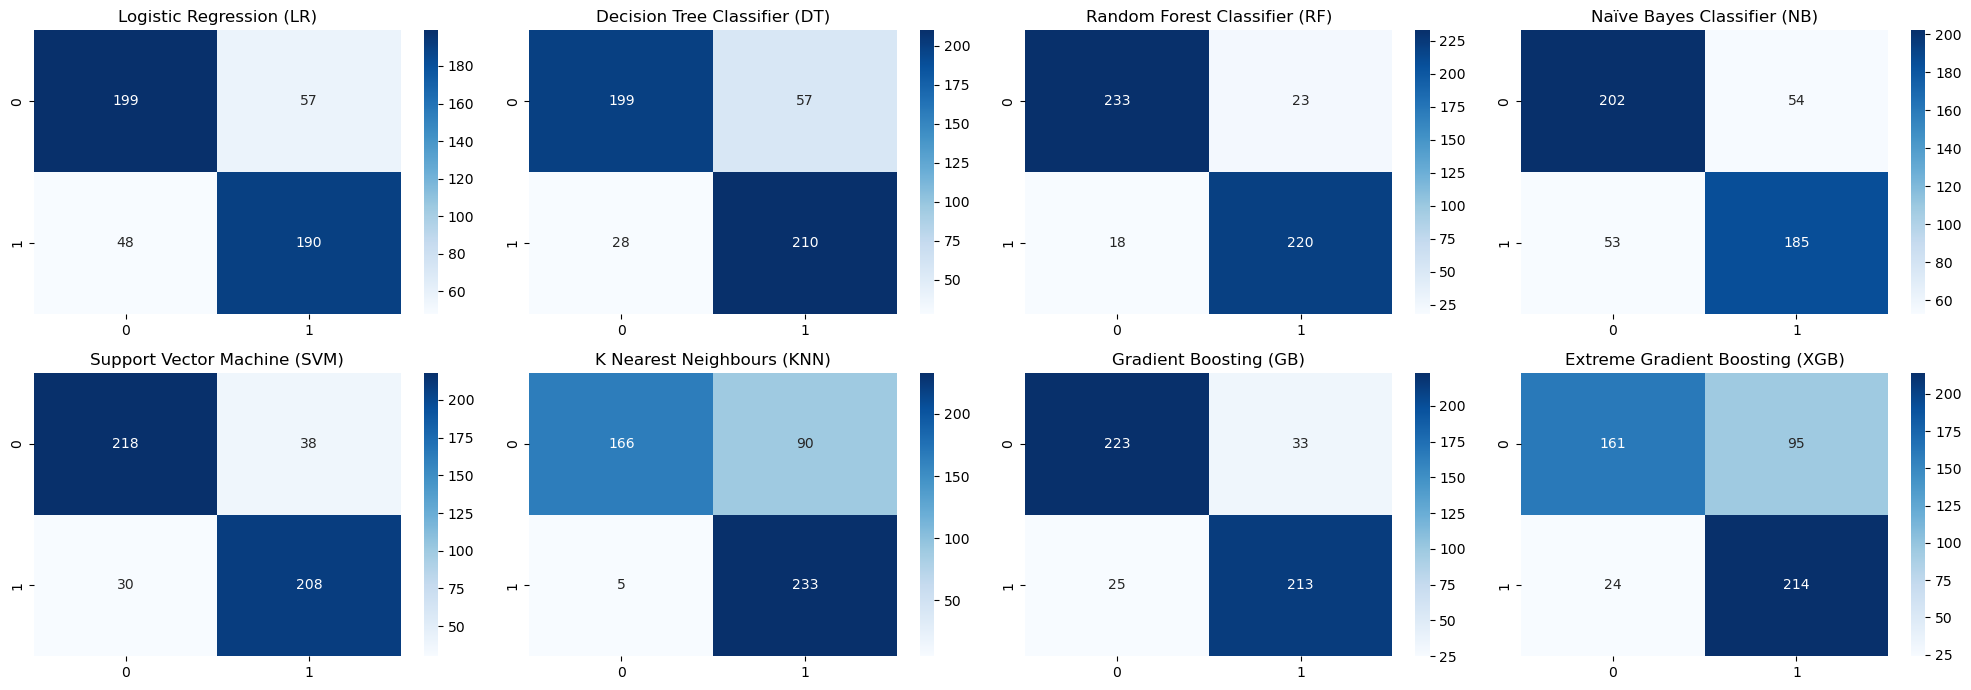

In [90]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(true_y, pred_y):
    cm = confusion_matrix(true_y, pred_y, labels=np.unique(true_y))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"
    
def conf_mat_plot(all_models):
    plt.figure(figsize=[20,3.5*math.ceil(len(all_models)*len(labels)/14)])
    
    for i in range(len(all_models)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(all_models)/3),3,i+1)
        pred = all_models[i].predict(test_X)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(test_y, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(Evaluation_Results.index[i])
    plt.tight_layout()
    plt.show()

conf_mat_plot([LR,DT,RF,NB,SVM,KNN,GB,XGB])

                                    ML Algorithms Comparison                                    


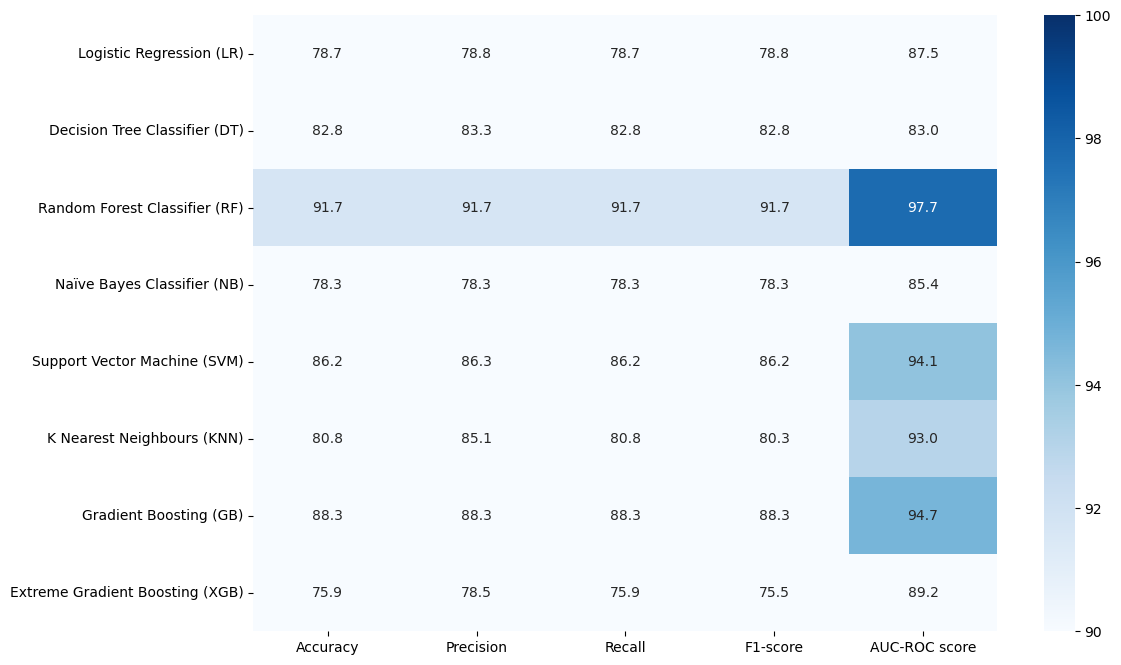

In [91]:
#Comparing all the models Scores

print('\033[1mML Algorithms Comparison'.center(100))
plt.figure(figsize=[12,8])
sns.heatmap(Evaluation_Results, annot=True, vmin=90, vmax=100, cmap='Blues', fmt='.1f')
plt.show()

**Insights:** For the current problem statement, it is more important to focus on the Precision score. We can note from the above heatmap that the Random Forest & Boosting Models Performed well on the current dataset...

# Project outcomes

1. The dataset consist of 1470 rows and 35 clomuns
2. There are no duplicates found
3. The samples were imbalanced after processing, hence SMOTE Technique was applied on the data to balance the classes,    adding    67.7% more samples to the dataset.
4. Feature Selection/Eliminination was carried out using PCA
5. The Random Forest Classifier & Graident Boost performed well on the current dataset, considering Precision Score as the key-    metric.
